In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("J:/Data science/data/countries.csv")

In [3]:
df.head()

,country,latitude,longitude,language
0,USA,44.97,-103.77,english
1,Canada,62.40,-96.80,english
2,France,46.75,2.40,french
3,UK,54.01,-2.53,english
4,Germany,51.15,10.40,german


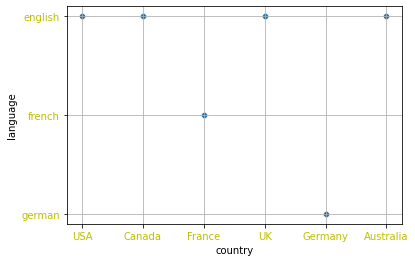

In [7]:
sns.scatterplot(data=df , x='country' , y='language')
plt.xticks(c='y')
plt.yticks(c='y')
plt.grid()

In [8]:
x = df[['country','language']]
x

,country,language
0,USA,english
1,Canada,english
2,France,french
3,UK,english
4,Germany,german
5,Australia,english


In [12]:
dummy_data = pd.get_dummies(x,drop_first=True)
dummy_data

,country_Canada,country_France,country_Germany,country_UK,country_USA,language_french,language_german
0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,1
5,0,0,0,0,0,0,0


In [13]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters=3,n_init=15)
model.fit(dummy_data)

KMeans(n_clusters=3, n_init=15)

In [15]:
y_pred = model.predict(dummy_data)
y_pred

array([0, 0, 2, 0, 1, 0])

In [17]:
cluster_data = df.copy()
cluster_data['cluster'] = y_pred
cluster_data

,country,latitude,longitude,language,cluster
0,USA,44.97,-103.77,english,0
1,Canada,62.40,-96.80,english,0
2,France,46.75,2.40,french,2
3,UK,54.01,-2.53,english,0
4,Germany,51.15,10.40,german,1
5,Australia,-25.45,133.11,english,0


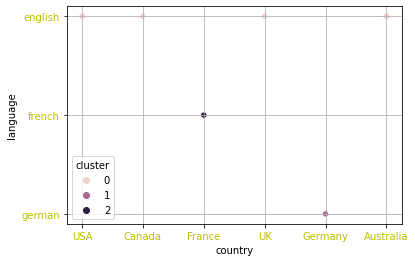

In [19]:
sns.scatterplot(data=cluster_data,x='country',y='language',hue='cluster')
plt.xticks(c='y')
plt.yticks(c='y')
plt.grid()

In [23]:
model.transform(dummy_data)

array([[0.8291562 , 1.73205081, 1.73205081],
       [0.8291562 , 1.73205081, 1.73205081],
       [1.47901995, 2.        , 0.        ],
       [0.8291562 , 1.73205081, 1.73205081],
       [1.47901995, 0.        , 2.        ],
       [0.4330127 , 1.41421356, 1.41421356]])

In [20]:
model.inertia_

2.25

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_score(dummy_data,model.labels_)

0.18042496462806237

In [28]:
sil_score = []
for i in range(2,6):
    km_model = KMeans(n_clusters=i , n_init=15)
    km_model.fit(dummy_data)
    sil_values = silhouette_score(dummy_data,km_model.labels_)
    sil_score.append(sil_values)
print(sil_score)

[0.16426943211521916, 0.18042496462806237, 0.048815536468908786, 0.04881553646890876]


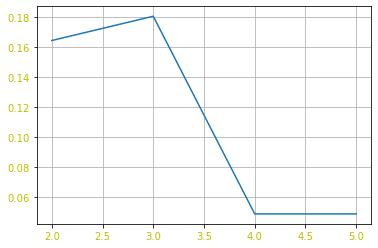

In [30]:
plt.plot(range(2,6) , sil_score)
plt.xticks(c='y')
plt.yticks(c='y')
plt.grid()